Import Libraries

In [ ]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import groupby
from operator import itemgetter
from scipy.signal import savgol_filter


Import & Clean Data

In [ ]:
lookednegative = scipy.io.loadmat('/content/lookedNegative.mat')
print(lookednegative.keys())

lookednegative_df = pd.DataFrame(lookednegative['lookedNegative'])
lookednegative_df

dict_keys(['__header__', '__version__', '__globals__', 'lookedNegative'])


0    1    2    3    4    5    6    7    8    9   ...   50   51   52   53  \
0   1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  ...  0.0  1.0  0.0  0.0   
1   0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  ...  1.0  0.0  1.0  0.0   
2   1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  1.0  0.0  1.0   
3   0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  ...  1.0  1.0  0.0  0.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
91  NaN  NaN  NaN  1.0  1.0  0.0  0.0  0.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
92  NaN  NaN  NaN  1.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
93  NaN  NaN  NaN  0.0  1.0  1.0  1.0  0.0  1.0  1.0  ...  1.0  0.0  1.0  1.0   
94  NaN  NaN  NaN  0.0  0.0  1.0  1.0  0.0  1.0  1.0  ...  1.0  0.0  0.0  1.0   
95  NaN  NaN  NaN  0.0  1.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  1.0  0.0  0.0   

     54   55   56   57   58   59  
0   0.0  0.0  0.0  0.0  1.0  0.0  
1   1.0  0.0  1.0  1.0  0.0  1.0  
2   1.0  0.0  0.0  1.0  0.0  0.0  
3   0.0  1.0  0.0  1.0  1.0  1.0  
4   0.0  1.0  1.0  0.0  0.0  0.0  
..  ...  ...  ...  ...  ...  ...  
91  1.0  0.0  1.0  0.0  0.0  1.0  
92  0.0  0.0  1.0  0.0  0.0  0.0  
93  0.0  0.0  0.0  0.0  0.0  0.0  
94  1.0  0.0  0.0  1.0  1.0  1.0  
95  1.0  0.0  0.0  1.0  0.0  0.0  

[96 rows x 60 columns]

In [ ]:
lookedpositive = scipy.io.loadmat('/content/lookedPositive.mat')
print(lookedpositive.keys())

lookedpositive_df = pd.DataFrame(lookedpositive['lookedPositive'])
lookedpositive_df

dict_keys(['__header__', '__version__', '__globals__', 'lookedPositive'])


0    1    2    3    4    5    6    7    8    9   ...   50   51   52   53  \
0   0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  1.0  1.0   
1   1.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  1.0  0.0  1.0   
2   0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  1.0  0.0   
3   1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
4   1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  1.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
91  NaN  NaN  NaN  0.0  0.0  1.0  1.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
92  NaN  NaN  NaN  0.0  0.0  1.0  0.0  1.0  1.0  1.0  ...  1.0  0.0  1.0  1.0   
93  NaN  NaN  NaN  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
94  NaN  NaN  NaN  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  1.0  0.0   
95  NaN  NaN  NaN  1.0  0.0  0.0  1.0  1.0  1.0  0.0  ...  1.0  0.0  1.0  1.0   

     54   55   56   57   58   59  
0   1.0  1.0  1.0  1.0  0.0  1.0  
1   0.0  1.0  0.0  0.0  1.0  0.0  
2   0.0  1.0  1.0  0.0  1.0  1.0  
3   1.0  0.0  1.0  0.0  0.0  0.0  
4   1.0  0.0  0.0  1.0  1.0  1.0  
..  ...  ...  ...  ...  ...  ...  
91  0.0  1.0  0.0  1.0  1.0  0.0  
92  1.0  1.0  0.0  1.0  1.0  1.0  
93  1.0  1.0  1.0  1.0  1.0  1.0  
94  0.0  1.0  1.0  0.0  0.0  0.0  
95  0.0  1.0  1.0  0.0  1.0  1.0  

[96 rows x 60 columns]

In [ ]:
picturetime = scipy.io.loadmat('/content/pictureTime.mat')
print(picturetime.keys())

picturetime_df = pd.DataFrame(picturetime['pictureTime'])
picturetime_df

dict_keys(['__header__', '__version__', '__globals__', 'pictureTime'])


0          1          2          3          4          5   \
0   5310104.0  1256856.0  3682122.0  3459694.0  2014844.0  1861472.0   
1   5316438.0  1263640.0  3688972.0  3465660.0  2021410.0  1867722.0   
2   5322938.0  1270440.0  3694990.0  3472060.0  2027644.0  1873606.0   
3   5328904.0  1276808.0  3701424.0  3478428.0  2034094.0  1879972.0   
4   5354838.0  1324424.0  3724524.0  3503028.0  2054078.0  1919790.0   
..        ...        ...        ...        ...        ...        ...   
91        NaN        NaN        NaN  5596390.0  5885626.0  5412826.0   
92        NaN        NaN        NaN  5604806.0  5894410.0  5421492.0   
93        NaN        NaN        NaN  5613206.0  5902976.0  5429726.0   
94        NaN        NaN        NaN  5621924.0  5911744.0  5438326.0   
95        NaN        NaN        NaN  5630408.0  5920444.0  5446926.0   

           6          7          8          9   ...         50          51  \
0    484920.0  4143524.0  2424502.0  3661858.0  ...  2051264.0  16516590.0   
1    493804.0  4149708.0  2431170.0  3668342.0  ...  2057632.0  16522922.0   
2    499954.0  4155842.0  2437570.0  3674426.0  ...  2063964.0  16528940.0   
3    506104.0  4162692.0  2443736.0  3680642.0  ...  2070098.0  16535556.0   
4    527788.0  4217510.0  2467420.0  3702260.0  ...  2117450.0  16559590.0   
..        ...        ...        ...        ...  ...        ...         ...   
91  5413538.0  7677916.0  7940596.0  5619798.0  ...  6828808.0  20161454.0   
92  5422022.0  7686700.0  7949396.0  5628198.0  ...  6836910.0  20170638.0   
93  5430188.0  7695384.0  7958246.0  5636998.0  ...  6845126.0  20179522.0   
94  5438390.0  7704066.0  7966780.0  5645132.0  ...  6853610.0  20188704.0   
95  5446840.0  7713000.0  7975396.0  5653350.0  ...  6861994.0  20197404.0   

           52         53         54         55         56          57  \
0   1470618.0  3713454.0   899604.0  1760498.0  4140908.0  12597044.0   
1   1477100.0  3719838.0   906254.0  1769166.0  4146876.0  12604026.0   
2   1483300.0  3726206.0   912754.0  1777600.0  4152458.0  12610610.0   
3   1489468.0  3737522.0   919088.0  1784450.0  4158108.0  12617394.0   
4   1511202.0  3755622.0   946122.0  1841984.0  4188776.0  12640228.0   
..        ...        ...        ...        ...        ...         ...   
91  4305936.0  7015008.0  5288604.0  5839626.0  7216654.0  16432380.0   
92  4314570.0  7023724.0  5297088.0  5848158.0  7228836.0  16441014.0   
93  4323354.0  7037626.0  5305722.0  5856560.0  7237504.0  16449514.0   
94  4331938.0  7046358.0  5314188.0  5864792.0  7246454.0  16458064.0   
95  4340938.0  7071992.0  5323006.0  5873026.0  7255254.0  16466980.0   

           58         59  
0   3835134.0  4550508.0  
1   3842734.0  4556592.0  
2   3849068.0  4563010.0  
3   3855468.0  4569892.0  
4   3878018.0  4594626.0  
..        ...        ...  
91  7307608.0  9574248.0  
92  7315942.0  9583332.0  
93  7324242.0  9591932.0  
94  7333008.0  9600698.0  
95  7341460.0  9609432.0  

[96 rows x 60 columns]

In [ ]:
rtpull = scipy.io.loadmat('/content/reactionTimePull.mat')
print(rtpull.keys())

rtpull_df = pd.DataFrame(rtpull['reactionTimePull'])
rtpull_df

dict_keys(['__header__', '__version__', '__globals__', 'reactionTimePull'])


0         1         2         3         4         5         6   \
0  -0.182722 -0.009464  0.012923       NaN -0.122852       NaN       NaN   
1  -0.042869       NaN -0.288312 -0.217740 -0.172644 -0.394949 -0.260381   
2  -0.517965       NaN -0.270240       NaN -0.269305 -0.204129       NaN   
3  -0.646139       NaN       NaN  0.035737       NaN       NaN  0.160081   
4        NaN       NaN -0.349690       NaN       NaN  0.018475       NaN   
..       ...       ...       ...       ...       ...       ...       ...   
91       NaN       NaN       NaN       NaN -0.013570       NaN       NaN   
92       NaN       NaN       NaN -0.131337 -0.250971       NaN       NaN   
93       NaN       NaN       NaN -0.104475 -0.074074       NaN -0.411594   
94       NaN       NaN       NaN -0.152659       NaN       NaN       NaN   
95       NaN       NaN       NaN -0.140007 -0.042660 -0.233228 -0.211896   

          7         8         9   ...        51        52        53        54  \
0  -0.187373       NaN       NaN  ...       NaN       NaN -0.088230       NaN   
1        NaN       NaN       NaN  ... -0.377295       NaN       NaN -0.094933   
2  -0.023160       NaN       NaN  ...       NaN       NaN       NaN       NaN   
3  -0.201094  0.354350       NaN  ...       NaN       NaN -0.165976       NaN   
4        NaN       NaN       NaN  ... -0.157627       NaN       NaN -0.102533   
..       ...       ...       ...  ...       ...       ...       ...       ...   
91 -0.160451 -0.076673 -0.311521  ...       NaN -0.193263 -0.150603       NaN   
92       NaN -0.168629 -0.177727  ...       NaN       NaN       NaN -0.194234   
93       NaN       NaN       NaN  ...  0.134461 -0.326751       NaN       NaN   
94  0.079097       NaN       NaN  ...       NaN       NaN       NaN -0.115924   
95       NaN -0.088475 -0.307423  ...       NaN       NaN -0.181451 -0.477025   

          55        56        57        58        59        60  
0        NaN       NaN       NaN  0.103719       NaN -0.226352  
1   0.464653 -0.159794       NaN -0.017689       NaN -0.112788  
2   0.048462 -0.267052       NaN       NaN       NaN       NaN  
3   0.452457 -0.326085       NaN  0.078541       NaN -0.224822  
4  -0.068204 -0.219724  0.292734  0.148614       NaN -0.171322  
..       ...       ...       ...       ...       ...       ...  
91 -0.251572 -0.348600       NaN -0.017519 -0.361238       NaN  
92 -0.376351       NaN       NaN -0.246206       NaN -0.244335  
93 -0.228246 -0.424680 -0.039855       NaN       NaN       NaN  
94 -0.399470       NaN -0.148097       NaN -0.232179 -0.182974  
95       NaN       NaN -0.181239  0.017776 -0.181835       NaN  

[96 rows x 61 columns]

In [ ]:
rtpush = scipy.io.loadmat('/content/reactionTimePush.mat')
print(rtpush.keys())

rtpush_df = pd.DataFrame(rtpush['reactionTimePush'])
rtpush_df

dict_keys(['__header__', '__version__', '__globals__', 'reactionTimePush'])


0         1         2         3         4         5         6         7   \
0  NaN       NaN       NaN -0.370661       NaN -0.402157       NaN       NaN   
1  NaN       NaN       NaN       NaN       NaN       NaN       NaN -0.256516   
2  NaN -0.311338       NaN -0.337758       NaN       NaN -0.199625       NaN   
3  NaN -0.337196 -0.104573       NaN       NaN -0.483795       NaN       NaN   
4  NaN -0.363655       NaN -0.212326 -0.408974       NaN -0.143496       NaN   
..  ..       ...       ...       ...       ...       ...       ...       ...   
91 NaN       NaN       NaN -0.365897       NaN -0.276667 -0.330303       NaN   
92 NaN       NaN       NaN       NaN       NaN       NaN -0.324089 -0.154311   
93 NaN       NaN       NaN       NaN       NaN -0.254632       NaN -0.121066   
94 NaN       NaN       NaN       NaN -0.001749 -0.266905 -0.151315       NaN   
95 NaN       NaN       NaN       NaN       NaN       NaN       NaN -0.155881   

          8         9   ...        51        52        53        54        55  \
0  -0.058881 -0.226688  ...       NaN       NaN       NaN -0.026576 -0.142938   
1  -0.307308 -0.393583  ...       NaN       NaN       NaN       NaN       NaN   
2  -0.168294 -0.450633  ... -0.118150 -0.224576 -0.125951 -0.160622       NaN   
3        NaN -0.386914  ...       NaN -0.279074       NaN -0.134422       NaN   
4  -0.437317 -0.413352  ...       NaN -0.207143 -0.003762       NaN       NaN   
..       ...       ...  ...       ...       ...       ...       ...       ...   
91       NaN       NaN  ...  0.033209       NaN       NaN -0.269885       NaN   
92       NaN       NaN  ... -0.004229  0.041664  0.254238       NaN       NaN   
93 -0.107635 -0.433699  ...       NaN       NaN -0.153534 -0.166165       NaN   
94 -0.205310 -0.352329  ... -0.070121  0.044256       NaN       NaN       NaN   
95       NaN       NaN  ...  0.119536 -0.430666       NaN       NaN -0.245040   

          56        57        58        59        60  
0        NaN       NaN       NaN  0.292678       NaN  
1        NaN       NaN       NaN -0.222659       NaN  
2        NaN       NaN -0.030809 -0.277785       NaN  
3        NaN       NaN       NaN -0.091657       NaN  
4        NaN       NaN       NaN -0.307765       NaN  
..       ...       ...       ...       ...       ...  
91       NaN       NaN       NaN       NaN  0.051357  
92 -0.396776 -0.041302       NaN -0.273871       NaN  
93       NaN       NaN -0.266482 -0.096802 -0.017769  
94 -0.294908       NaN  0.016460       NaN       NaN  
95 -0.478800       NaN       NaN       NaN -0.106614  

[96 rows x 61 columns]

In [ ]:
saccade = scipy.io.loadmat('/content/saccadeTime.mat')
print(saccade.keys())

saccade_df = pd.DataFrame(saccade['saccadeTime'])
saccade_df

dict_keys(['__header__', '__version__', '__globals__', 'saccadeTime'])


0          1          2          3          4          5   \
0   5310250.0  1257092.0  3682334.0  3459996.0  2015006.0  1861680.0   
1   5316580.0  1263778.0  3689276.0  3465956.0  2021552.0  1867930.0   
2   5323038.0  1270602.0  3695304.0  3472308.0  2027800.0  1873804.0   
3   5329026.0  1276946.0  3701768.0  3478434.0  2034330.0  1880244.0   
4   5354992.0  1324580.0  3724558.0  3503034.0  2054256.0  1919978.0   
..        ...        ...        ...        ...        ...        ...   
91        NaN        NaN        NaN  5596690.0  5885766.0  5412978.0   
92        NaN        NaN        NaN  5605058.0  5894686.0  5421654.0   
93        NaN        NaN        NaN  5613268.0  5903458.0  5429892.0   
94        NaN        NaN        NaN  5622204.0  5911918.0  5438488.0   
95        NaN        NaN        NaN  5630774.0  5920936.0  5447102.0   

           6          7          8          9   ...         50          51  \
0    485080.0  4143706.0  2424702.0  3662008.0  ...  2051526.0  16516808.0   
1    493964.0  4149850.0  2431460.0  3668526.0  ...  2057768.0  16523072.0   
2    500110.0  4156004.0  2437894.0  3674564.0  ...  2064222.0  16529134.0   
3    506252.0  4162838.0  2443982.0  3680810.0  ...  2070312.0  16535598.0   
4    527946.0  4217726.0  2467518.0  3702400.0  ...  2117864.0  16559810.0   
..        ...        ...        ...        ...  ...        ...         ...   
91  5413706.0  7678064.0  7940868.0  5619948.0  ...  6828930.0  20161668.0   
92  5422172.0  7686708.0  7949634.0  5628348.0  ...  6837038.0  20170844.0   
93  5430460.0  7695544.0  7958494.0  5637134.0  ...  6845252.0  20179740.0   
94  5438550.0  7704262.0  7966934.0  5645272.0  ...  6853758.0  20188872.0   
95  5447014.0  7713260.0  7975562.0  5653502.0  ...  6862122.0  20197674.0   

           52         53         54         55         56          57  \
0   1470976.0  3713646.0   899808.0  1760552.0  4141084.0  12597218.0   
1   1477160.0  3719964.0   906440.0  1769304.0  4147040.0  12604170.0   
2   1483456.0  3726288.0   913100.0  1777780.0  4152596.0  12610738.0   
3   1489614.0  3737604.0   919134.0  1784588.0  4158272.0  12617532.0   
4   1511246.0  3755704.0   946328.0  1842128.0  4188926.0  12640360.0   
..        ...        ...        ...        ...        ...         ...   
91  4306184.0  7015166.0  5288766.0  5839674.0  7216930.0  16432574.0   
92  4314762.0  7023882.0  5297280.0  5848284.0  7229012.0  16441190.0   
93  4323502.0  7037784.0  5305820.0  5856694.0  7237650.0  16449670.0   
94  4332098.0  7046516.0  5314334.0  5864832.0  7246686.0  16458246.0   
95  4340946.0  7072066.0  5323148.0  5873166.0  7255450.0  16467216.0   

           58         59  
0   3835370.0  4550646.0  
1   3842864.0  4556718.0  
2   3849230.0  4563074.0  
3   3855868.0  4570028.0  
4   3878418.0  4594772.0  
..        ...        ...  
91  7307750.0  9574392.0  
92  7316130.0  9583466.0  
93  7324302.0  9592402.0  
94  7333068.0  9600746.0  
95  7341702.0  9609608.0  

[96 rows x 60 columns]

In [ ]:
sidelook = scipy.io.loadmat('/content/sideLooked.mat')
print(sidelook.keys())

sidelook_df = pd.DataFrame(sidelook['sideLooked'])
sidelook_df

dict_keys(['__header__', '__version__', '__globals__', 'sideLooked'])


0    1    2    3    4    5    6    7    8    9   ...   50   51   52   53  \
0   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
1   1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  1.0  1.0  0.0  1.0   
2   1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0  1.0   
3   1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0  1.0   
4   1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
91  NaN  NaN  NaN  1.0  1.0  1.0  0.0  1.0  1.0  0.0  ...  1.0  0.0  1.0  0.0   
92  NaN  NaN  NaN  1.0  1.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   
93  NaN  NaN  NaN  1.0  0.0  1.0  1.0  1.0  1.0  0.0  ...  1.0  1.0  1.0  0.0   
94  NaN  NaN  NaN  1.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  1.0  1.0  0.0   
95  NaN  NaN  NaN  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  1.0  1.0  1.0  1.0   

     54   55   56   57   58   59  
0   0.0  0.0  0.0  0.0  1.0  0.0  
1   0.0  0.0  0.0  0.0  0.0  0.0  
2   0.0  0.0  0.0  0.0  0.0  0.0  
3   1.0  0.0  0.0  0.0  0.0  0.0  
4   0.0  0.0  0.0  0.0  0.0  0.0  
..  ...  ...  ...  ...  ...  ...  
91  0.0  0.0  0.0  1.0  0.0  1.0  
92  0.0  0.0  0.0  0.0  0.0  1.0  
93  0.0  0.0  0.0  0.0  1.0  0.0  
94  0.0  0.0  0.0  0.0  1.0  0.0  
95  0.0  0.0  1.0  1.0  0.0  1.0  

[96 rows x 60 columns]

In [ ]:
x_left = scipy.io.loadmat('xPositionLeft.mat')['xPositionLeft']
x_right = scipy.io.loadmat('xPositionRight.mat')['xPositionRight']
time_vec = scipy.io.loadmat('timeVector.mat')['timeVector']

In [ ]:
x_left_merged.shape

(60, 96, 2001)

In [ ]:
x_right_merged.shape

(60, 96, 2001)

In [ ]:
time_merged.shape

(60, 96, 2001)

#Defining Threshold

In [ ]:
#middle of the screen 960

lower_threshold = 860
upper_threshold = 1060

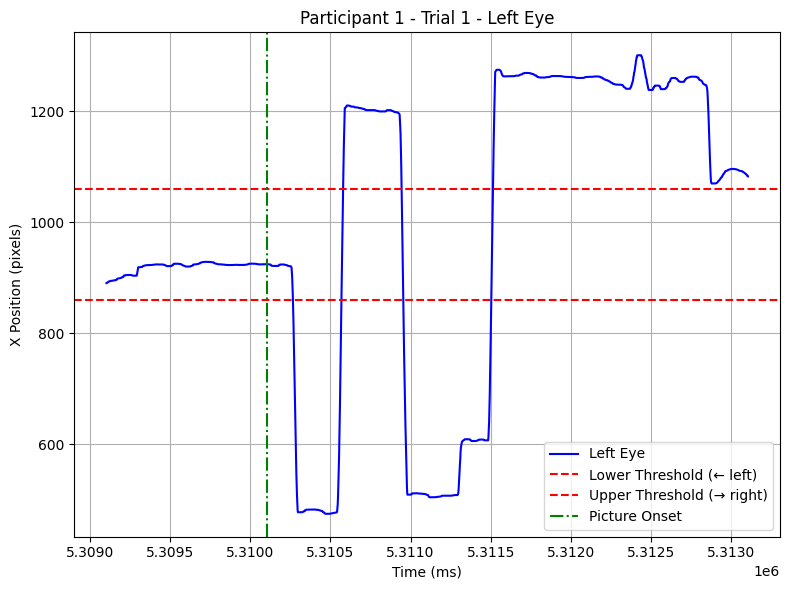

In [ ]:
p = 0
t = 0

x_left = x_left_merged[p, t, :]
time = time_merged[p, t, :]

# Picture onset time (500th sample point)
onset_index = 500
onset_time = time[onset_index]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(time, x_left, label='Left Eye', color='blue')

# Threshold lines
plt.axhline(y=lower_threshold, color='red', linestyle='--', label='Lower Threshold (← left)')
plt.axhline(y=upper_threshold, color='red', linestyle='--', label='Upper Threshold (→ right)')

# Picture onset line
plt.axvline(x=onset_time, color='green', linestyle='-.', label='Picture Onset')

# Ploting
plt.title(f'Participant {p+1} - Trial {t+1} - Left Eye')
plt.xlabel('Time (ms)')
plt.ylabel('X Position (pixels)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


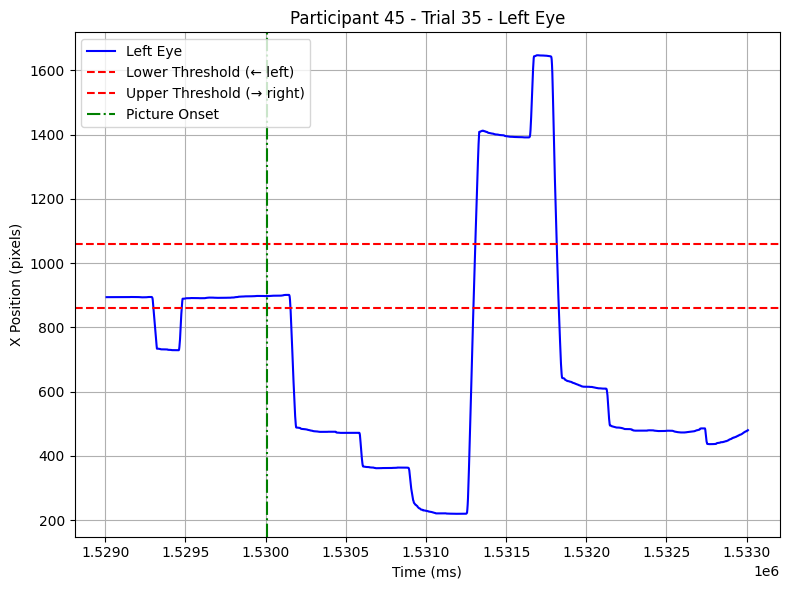

In [ ]:
p = 44
t = 34

x_left = x_left_merged[p, t, :]
time = time_merged[p, t, :]

# Picture onset time (500th sample point)
onset_index = 500
onset_time = time[onset_index]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(time, x_left, label='Left Eye', color='blue')

# Threshold lines
plt.axhline(y=lower_threshold, color='red', linestyle='--', label='Lower Threshold (← left)')
plt.axhline(y=upper_threshold, color='red', linestyle='--', label='Upper Threshold (→ right)')

# Picture onset line
plt.axvline(x=onset_time, color='green', linestyle='-.', label='Picture Onset')

# Ploting
plt.title(f'Participant {p+1} - Trial {t+1} - Left Eye')
plt.xlabel('Time (ms)')
plt.ylabel('X Position (pixels)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Appliyin threshold for all data

In [ ]:
# Currently only LEFT EYE is used.
# This may be replaced with DOMINANT EYE data in the future.
eye_data = x_left_merged
time_data = time_merged

# Empty list to store results
results = []

# For each participant and each trial
for p in range(eye_data.shape[0]):  # participant
    for t in range(eye_data.shape[1]):  #  trials
        x_eye = eye_data[p, t, :]
        time = time_data[p, t, :]

        # Let's find which region it is in for each time point
        labels = []
        for x in x_eye:
            if x < lower_threshold:
                labels.append('left')
            elif x > upper_threshold:
                labels.append('right')
            else:
                labels.append('center')

        # Trial result
        trial_result = pd.DataFrame({
            'Participant': p + 1,
            'Trial': t + 1,
            'Time(ms)': time,
            'X_Eye_Position': x_eye,
            'Region': labels
        })

        results.append(trial_result)

# Merge all trials
final_df = pd.concat(results, ignore_index=True)

# Final look
print(final_df)


          Participant  Trial   Time(ms)  X_Eye_Position  Region
0                   1      1  5309104.0      890.375000  center
1                   1      1  5309106.0      890.625000  center
2                   1      1  5309108.0      890.875000  center
3                   1      1  5309110.0      891.500000  center
4                   1      1  5309112.0      891.875000  center
...               ...    ...        ...             ...     ...
11525755           60     96  9612424.0     1350.003106   right
11525756           60     96  9612426.0     1349.809783   right
11525757           60     96  9612428.0     1349.616460   right
11525758           60     96  9612430.0     1349.423137   right
11525759           60     96  9612432.0     1349.229814   right

[11525760 rows x 5 columns]


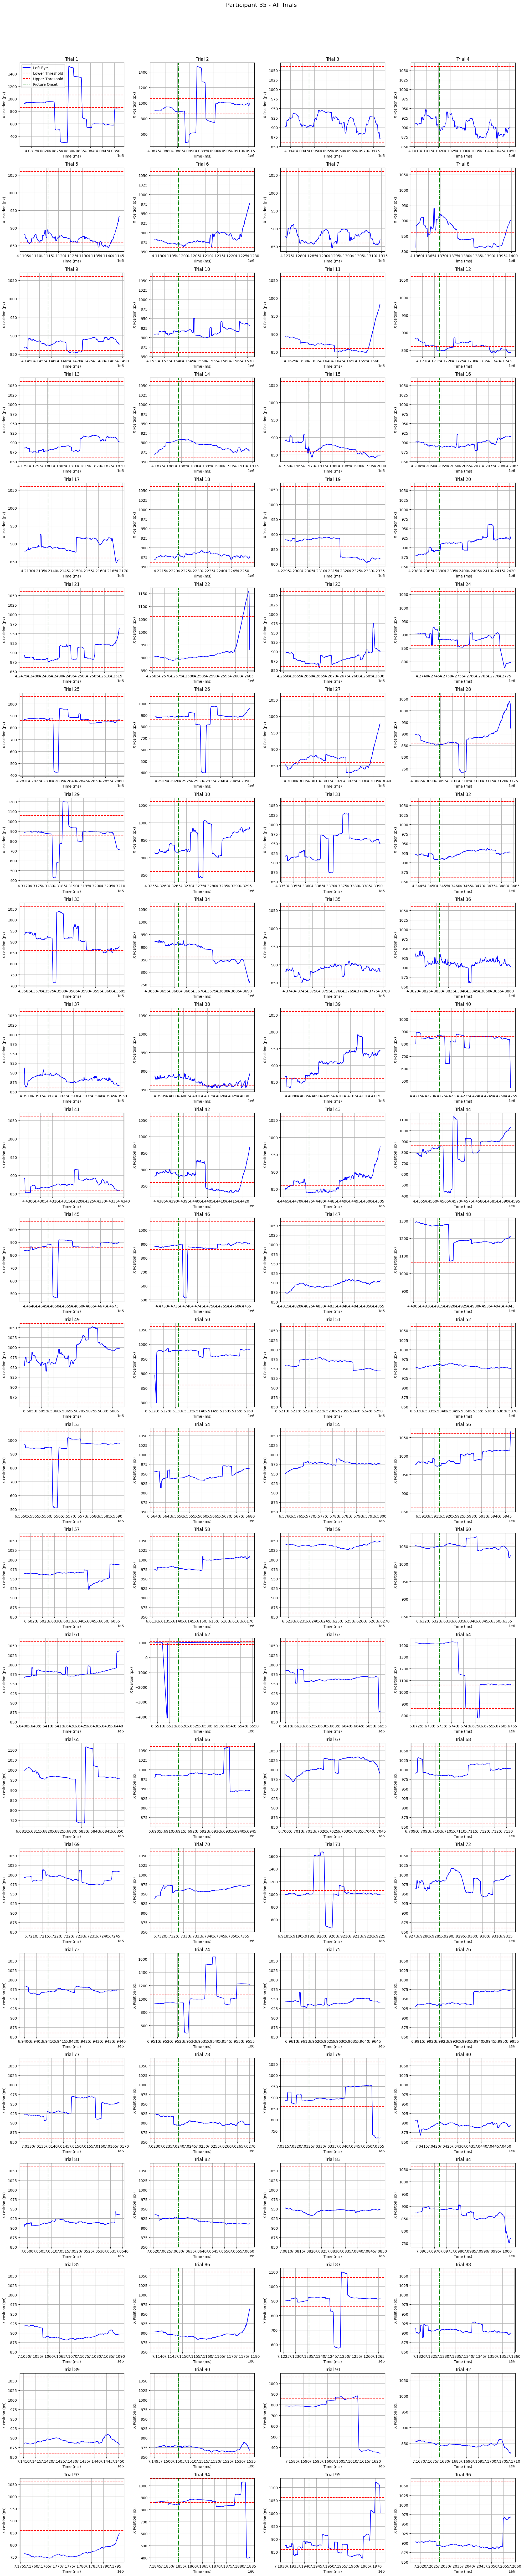

In [ ]:
# Select the participant (0-indexed)
p = 34

# Get the total number of trials for this participant
num_trials = time_merged.shape[1]

# Define the number of columns in the subplot layout
cols = 4
# Calculate the number of rows needed (rounded up)
rows = (num_trials + cols - 1) // cols

# Set the overall figure size based on the number of subplots
plt.figure(figsize=(cols * 5, rows * 4))

# Loop through each trial for the selected participant
for t in range(num_trials):
    # Extract left eye x-position and time data
    x_left = x_left_merged[p, t, :]
    time = time_merged[p, t, :]

    # Define picture onset time (500th sample point)
    onset_index = 500
    onset_time = time[onset_index]

    # Create a subplot for the current trial
    ax = plt.subplot(rows, cols, t + 1)

    # Plot the left eye x-position over time
    ax.plot(time, x_left, label='Left Eye', color='blue')

    # Add horizontal threshold lines (left and right)
    ax.axhline(y=lower_threshold, color='red', linestyle='--', label='Lower Threshold')
    ax.axhline(y=upper_threshold, color='red', linestyle='--', label='Upper Threshold')

    # Add a vertical line for picture onset
    ax.axvline(x=onset_time, color='green', linestyle='-.', label='Picture Onset')

    # Add labels and grid
    ax.set_title(f'Trial {t+1}')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('X Position (px)')
    ax.grid(True)

    # Only show the legend on the first subplot to avoid clutter
    if t == 0:
        ax.legend()

# Adjust layout and add a common title
plt.tight_layout()
plt.suptitle(f'Participant {p+1} - All Trials', fontsize=16, y=1.02)
plt.show()

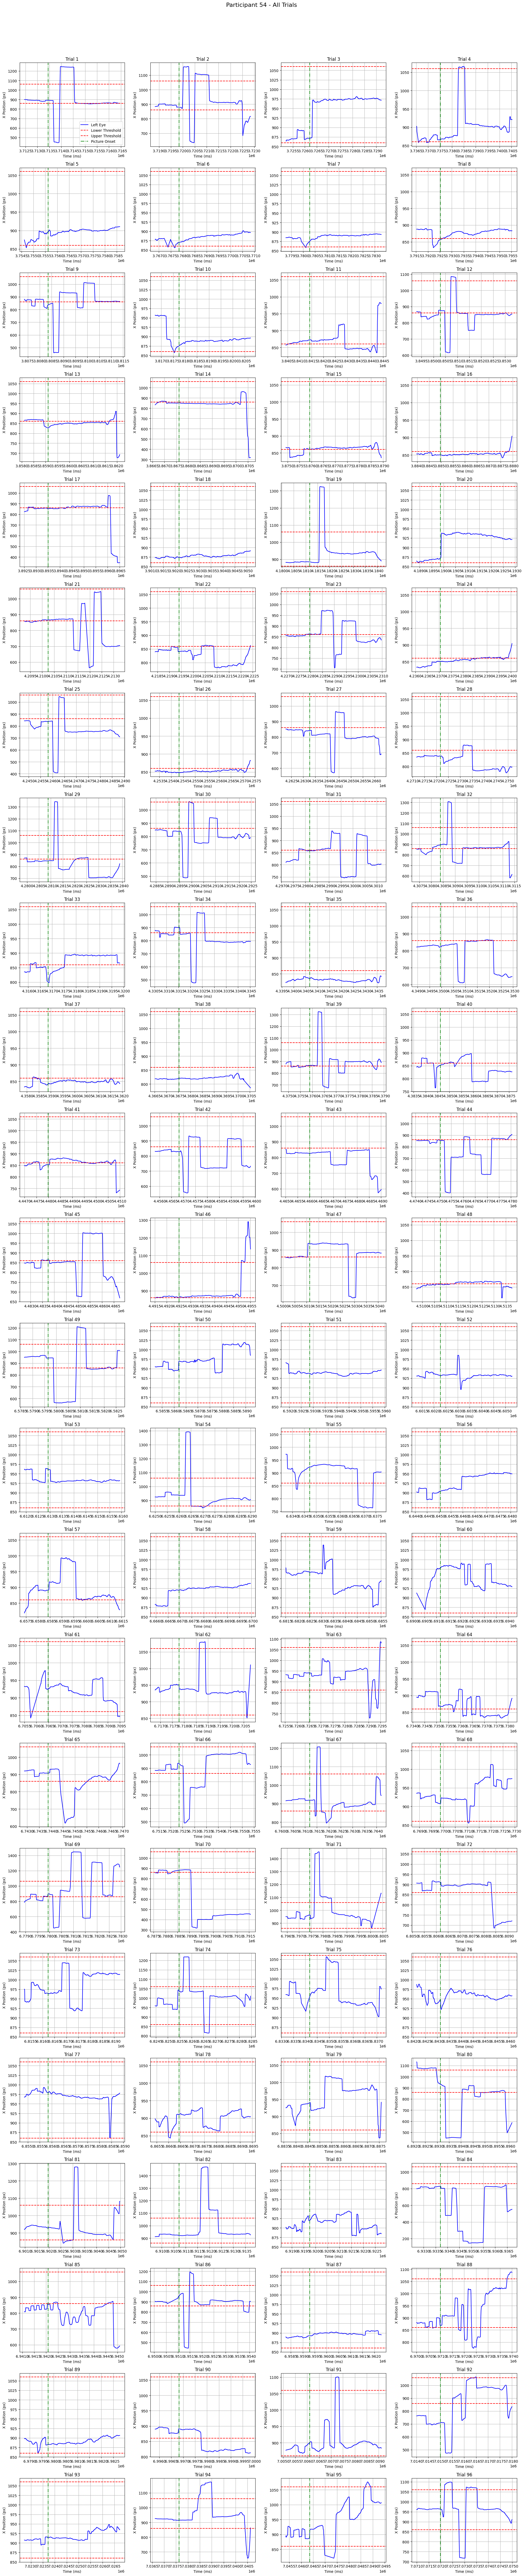

In [ ]:
# Select the participant (0-indexed)
p = 53

# Get the total number of trials for this participant
num_trials = time_merged.shape[1]

# Define the number of columns in the subplot layout
cols = 4
# Calculate the number of rows needed (rounded up)
rows = (num_trials + cols - 1) // cols

# Set the overall figure size based on the number of subplots
plt.figure(figsize=(cols * 5, rows * 4))

# Loop through each trial for the selected participant
for t in range(num_trials):
    # Extract left eye x-position and time data
    x_left = x_left_merged[p, t, :]
    time = time_merged[p, t, :]

    # Define picture onset time (500th sample point)
    onset_index = 500
    onset_time = time[onset_index]

    # Create a subplot for the current trial
    ax = plt.subplot(rows, cols, t + 1)

    # Plot the left eye x-position over time
    ax.plot(time, x_left, label='Left Eye', color='blue')

    # Add horizontal threshold lines (left and right)
    ax.axhline(y=lower_threshold, color='red', linestyle='--', label='Lower Threshold')
    ax.axhline(y=upper_threshold, color='red', linestyle='--', label='Upper Threshold')

    # Add a vertical line for picture onset
    ax.axvline(x=onset_time, color='green', linestyle='-.', label='Picture Onset')

    # Add labels and grid
    ax.set_title(f'Trial {t+1}')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('X Position (px)')
    ax.grid(True)

    # Only show the legend on the first subplot to avoid clutter
    if t == 0:
        ax.legend()

# Adjust layout and add a common title
plt.tight_layout()
plt.suptitle(f'Participant {p+1} - All Trials', fontsize=16, y=1.02)
plt.show()

#First Fixation Calculation

In [ ]:
from itertools import groupby
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import scipy.io as sio

In [ ]:
# Parameters
picture_onset_index = 500
velocity_threshold = 5
stability_threshold = 50
window_size = 20
screen_center = 960
margin = 100
lower_threshold = screen_center - margin
upper_threshold = screen_center + margin

In [ ]:
# Dimensions and empty matrices
num_participants, num_trials, _ = x_left_merged.shape
fixation_start_times = np.full((num_participants, num_trials), np.nan)
fixation_end_times = np.full((num_participants, num_trials), np.nan)
missing_fixation_trials = []

for row in range(num_participants):
    for trial in range(num_trials):
        x_data = x_left_merged[row, trial, :]
        t_data = time_merged[row, trial, :]
        velocity = np.abs(np.diff(x_data))

        saccade_detected = False
        fixation_start = None

        # Picture onset time
        onset_time = t_data[picture_onset_index]

        # Find the first fixation
        for i in range(picture_onset_index + 20, len(x_data) - window_size):
            if not saccade_detected:
                # Saccade detected only if velocity is high and eye moved outside threshold
                if velocity[i - 1] > velocity_threshold and (x_data[i] < lower_threshold or x_data[i] > upper_threshold):
                    saccade_detected = True
                    continue

            if saccade_detected:
                window = x_data[i : i + window_size]
                if np.nanmax(window) - np.nanmin(window) <= stability_threshold:
                    # Ensure fixation point is outside the center threshold zone
                    if x_data[i] < lower_threshold or x_data[i] > upper_threshold:
                        fixation_start = t_data[i + 3]
                        break

        # If there is fixation, find its ending
        if fixation_start is not None:
            fixation_end = None
            try:
                fixation_index = np.nanargmin(np.abs(t_data - fixation_start))
            except:
                fixation_index = picture_onset_index  # fallback

            fixation_dir = 'left' if x_data[fixation_index] < screen_center else 'right'
            last_stable = None

            for i in range(fixation_index + 1, len(x_data) - window_size):
                window = x_data[i - window_size : i]
                if np.nanmax(window) - np.nanmin(window) <= stability_threshold:
                    last_stable = t_data[i - 3]

                if (
                    velocity[i - 1] > velocity_threshold and
                    ((fixation_dir == 'left' and x_data[i] > lower_threshold) or
                     (fixation_dir == 'right' and x_data[i] < upper_threshold))
                ):
                    fixation_end = last_stable if last_stable is not None else t_data[i - 1]
                    break

            if fixation_end is None:
                fixation_end = t_data[-1]

            fixation_start_times[row, trial] = fixation_start
            fixation_end_times[row, trial] = fixation_end
        else:
            missing_fixation_trials.append((row, trial))

# Save the fixation times
sio.savemat("fixationStartTimes.mat", {"fixationStartTimes": fixation_start_times})
sio.savemat("fixationEndTimes.mat", {"fixationEndTimes": fixation_end_times})

print("Fixation start and end times were recorded.")
print(f"Number of trials where fixation was not found: {len(missing_fixation_trials)}")

Fixation start and end times were recorded.
Number of trials where fixation was not found: 177


In [ ]:
print("Fixation start and end times were recorded.")
print(f" Number of trials where fixation was not found: {len(missing_fixation_trials)}")

Fixation start and end times were recorded.
 Number of trials where fixation was not found: 177


In [ ]:
missing_readable = [(p + 1, t + 1) for p, t in missing_fixation_trials]
missing_df = pd.DataFrame(missing_readable, columns=['Participant', 'Trial'])

In [ ]:
missing_df

Participant  Trial
0              1     81
1              1     82
2              1     83
3              1     84
4              1     85
..           ...    ...
172           54     83
173           54     87
174           54     89
175           54     93
176           57     51

[177 rows x 2 columns]

In [ ]:
def plot_fixation(participant_number, trial_number):
    # Parameters
    picture_onset_index = 500
    screen_center = 960
    margin = 100
    lower_threshold = screen_center - margin
    upper_threshold = screen_center + margin

    # Python index
    p = participant_number - 1
    t = trial_number - 1

    # Load data
    x_data = x_left_merged[p, t, :]
    t_data = time_merged[p, t, :]
    fixation_start = fixation_start_times[p, t]
    fixation_end = fixation_end_times[p, t]
    onset_time = t_data[picture_onset_index]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(t_data, x_data, color='black', label='X Position (Left Eye)')
    plt.axvline(x=onset_time, color='green', linestyle='--', label='Picture Onset')
    plt.axhline(y=lower_threshold, color='red', linestyle='--', label='Lower Threshold')
    plt.axhline(y=upper_threshold, color='red', linestyle='--', label='Upper Threshold')

    # Define fixation
    if not np.isnan(fixation_start) and not np.isnan(fixation_end):

        start_idx = np.nanargmin(np.abs(t_data - fixation_start))
        end_idx = np.nanargmin(np.abs(t_data - fixation_end))

        # Show First fixation
        plt.plot(t_data[start_idx:end_idx+1], x_data[start_idx:end_idx+1],
                 color='blue', linewidth=2, label='Detected Fixation')
        plt.axvline(x=fixation_start, color='purple', linestyle='--', label='Fixation Start')
        plt.axvline(x=fixation_end, color='orange', linestyle='--', label='Fixation End')
        plt.title(f"Participant {participant_number}, Trial {trial_number} – First Fixation")
    else:
        plt.title(f"Participant {participant_number}, Trial {trial_number} – ⚠️ No fixation detected")

    # Plotting
    plt.xlabel("Time (ms)")
    plt.ylabel("X Position (pixels)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

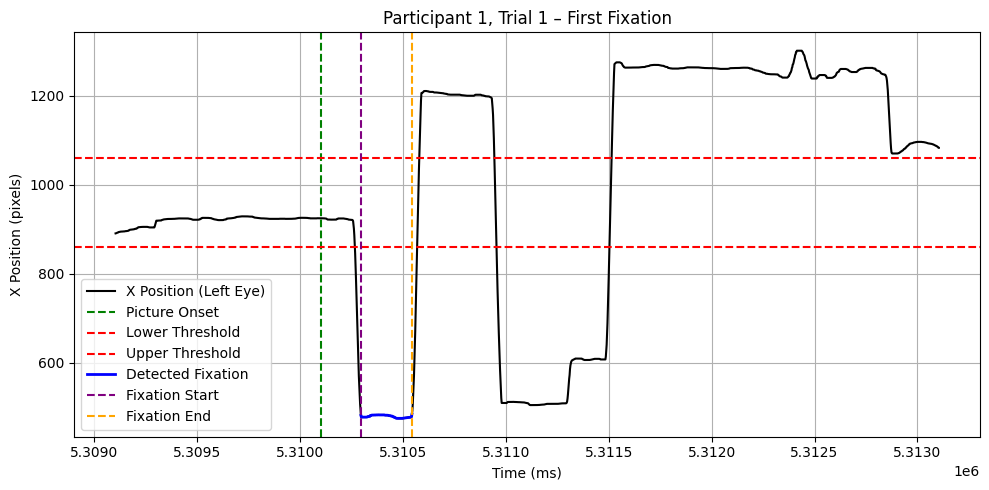

In [ ]:
plot_fixation(1, 1)

In [ ]:
num_participants, num_trials = fixation_start_times.shape

# Empty list
records = []

# All paticipants and trials
for p in range(num_participants):
    for t in range(num_trials):
        fixation_time = fixation_start_times[p, t]

        records.append({
            "Participant": p + 1,
            "Trial": t + 1,
            "Fixation_Start_Time": fixation_time
        })

# DataFrame
first_fixation_df = pd.DataFrame(records)

In [ ]:
first_fixation_df

Participant  Trial  Fixation_Start_Time
0               1      1            5310296.0
1               1      2            5316634.0
2               1      3            5323100.0
3               1      4            5329088.0
4               1      5            5355050.0
...           ...    ...                  ...
5755           60     92            9574870.0
5756           60     93            9583530.0
5757           60     94            9592456.0
5758           60     95            9600960.0
5759           60     96            9609658.0

[5760 rows x 3 columns]

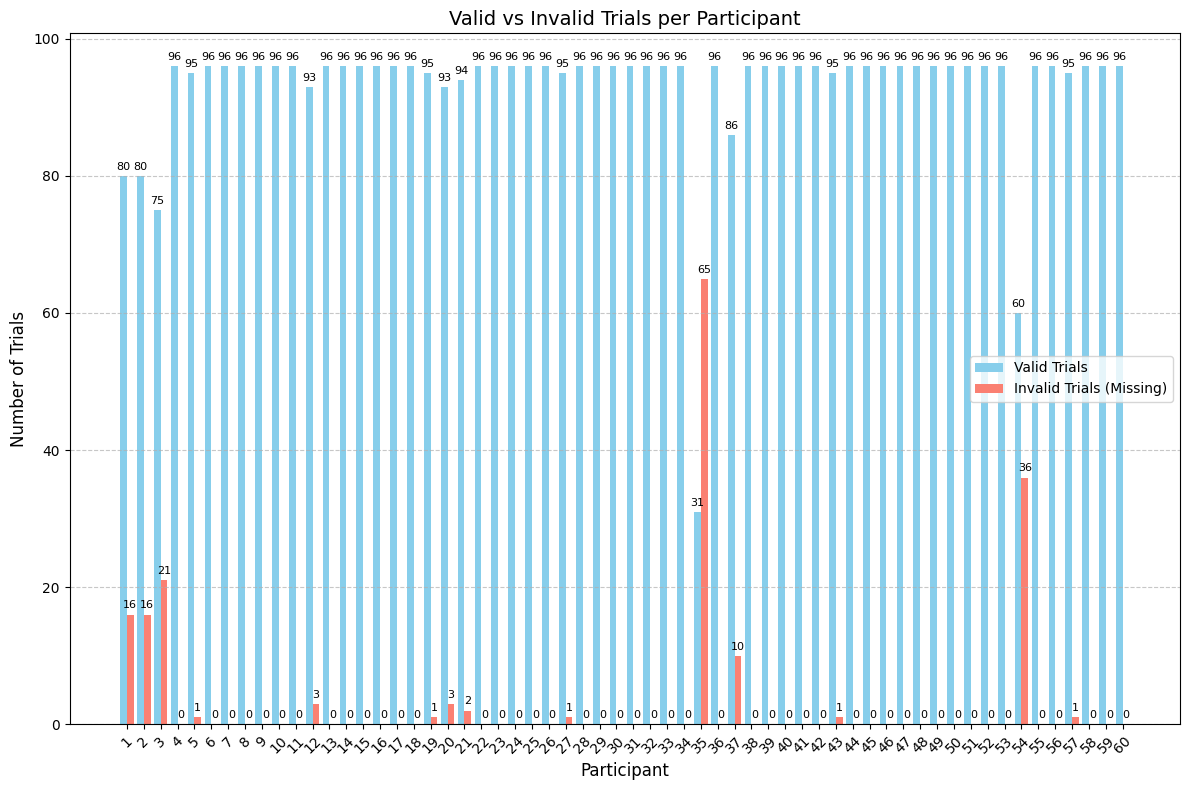

In [ ]:
# Count fixation numbers
valid_counts = first_fixation_df.groupby('Participant')['Fixation_Start_Time'].apply(lambda x: x.notna().sum())
invalid_counts = first_fixation_df.groupby('Participant')['Fixation_Start_Time'].apply(lambda x: x.isna().sum())


fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.4
index = np.arange(len(valid_counts))

# Bars
bars1 = ax.bar(index, valid_counts, bar_width, label='Valid Trials', color='skyblue')
bars2 = ax.bar(index + bar_width, invalid_counts, bar_width, label='Invalid Trials (Missing)', color='salmon')

# Grid
ax.yaxis.grid(True, linestyle='--', alpha=0.7)


for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

# plot
ax.set_xlabel('Participant', fontsize=12)
ax.set_ylabel('Number of Trials', fontsize=12)
ax.set_title('Valid vs Invalid Trials per Participant', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(valid_counts.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()